# Problem Set 1 - Neural network implementation

___

##### Group PS1A
- Giulia Maria Petrilli, 236888
- Nicolas Reichardt, 245611
- Elena Murray, 239793

##### External sources:

The project team made use of external tools to provide support and review solutions to the questions. The large-language model GPT-5 (through ChatGPT) was used to review, lint, and correct code issues and help in typsetting LaTex. Wolfram Alpha was used for mathematical operations like finding the eigenvalues in the practical part. See references in the PDF document.


____

As described in section "3 Neural network implementation" of assignment 1, the goal is to build a shallow neural network from scratch using different approaches. To validate that your code is working and that the network is actually learning something, please use the following MNIST classification task. Finally, please submit proof of the learning progress as described in the assignment.

## Imports

In [31]:
import random
import pandas as pd
import numpy as np
from sklearn import model_selection
import sklearn.datasets as sk_datasets
import torchvision.datasets as torch_datasets
from torchvision import transforms
import torch
import matplotlib.pyplot as plt
import itertools # For easier hyperparameter tuning
import warnings
warnings.filterwarnings('ignore') # Ignore conda warnings 


from scratch.network import Network
from scratch.res_network import ResNetwork
from pytorch.network import TorchNetwork
from scratch.utils import *

In [32]:
# Automatically load changes in imported modules
%load_ext autoreload
%autoreload 2

# Explicitly set seed for reproducibility
GLOBAL_RANDOM_STATE = 42

random.seed(GLOBAL_RANDOM_STATE)
np.random.seed(GLOBAL_RANDOM_STATE)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## A) Neural Network Classifier from Scratch

### Data

In [33]:
# Download MNIST dataset
x, y_cat = sk_datasets.fetch_openml('mnist_784', version=1, return_X_y=True, cache=True, as_frame=False)

# Preprocess dataset
x = (x / 255).astype('float32')
y_cat = y_cat.astype(int)
# One-hot encode y
y = np.zeros((len(y_cat), 10))
for i, val in enumerate(y_cat):
    y[i, val] = 1

# Use only small subset of data for faster training
x = x[:1000]
y = y[:1000]

# Split data into train and validation set
x_train, x_val, y_train, y_val = model_selection.train_test_split(x, y, test_size=0.2, random_state=GLOBAL_RANDOM_STATE)



### ML Model & Training

In [34]:
fnn = Network(sizes=[784, 128, 64, 10], learning_rate=0.1, epochs=50)
fnn.fit(x_train, y_train, x_val, y_val, cosine_annealing_lr=False)

Epoch: 1, Training Time: 0.30s, Training Accuracy: 23.62%, Validation Accuracy: 22.00%
Epoch: 2, Training Time: 0.57s, Training Accuracy: 28.75%, Validation Accuracy: 29.00%
Epoch: 3, Training Time: 0.85s, Training Accuracy: 36.00%, Validation Accuracy: 33.50%
Epoch: 4, Training Time: 1.16s, Training Accuracy: 45.25%, Validation Accuracy: 39.50%
Epoch: 5, Training Time: 1.45s, Training Accuracy: 54.00%, Validation Accuracy: 49.00%
Epoch: 6, Training Time: 1.75s, Training Accuracy: 60.00%, Validation Accuracy: 56.00%
Epoch: 7, Training Time: 2.04s, Training Accuracy: 65.75%, Validation Accuracy: 61.00%
Epoch: 8, Training Time: 2.33s, Training Accuracy: 69.12%, Validation Accuracy: 65.50%
Epoch: 9, Training Time: 2.63s, Training Accuracy: 70.75%, Validation Accuracy: 67.00%
Epoch: 10, Training Time: 2.91s, Training Accuracy: 72.25%, Validation Accuracy: 68.00%
Epoch: 11, Training Time: 3.19s, Training Accuracy: 73.62%, Validation Accuracy: 70.50%
Epoch: 12, Training Time: 3.48s, Training

### Test cosine annealing scheduler

In [35]:
fnn.fit(x_train, y_train, x_val, y_val, cosine_annealing_lr=True)

Epoch: 1, Training Time: 0.29s, Training Accuracy: 88.50%, Validation Accuracy: 80.00%
Epoch: 2, Training Time: 0.57s, Training Accuracy: 88.50%, Validation Accuracy: 79.50%
Epoch: 3, Training Time: 0.86s, Training Accuracy: 88.50%, Validation Accuracy: 79.50%
Epoch: 4, Training Time: 1.14s, Training Accuracy: 88.75%, Validation Accuracy: 79.50%
Epoch: 5, Training Time: 1.50s, Training Accuracy: 88.75%, Validation Accuracy: 79.00%
Epoch: 6, Training Time: 1.81s, Training Accuracy: 88.88%, Validation Accuracy: 79.00%
Epoch: 7, Training Time: 2.16s, Training Accuracy: 88.88%, Validation Accuracy: 79.00%
Epoch: 8, Training Time: 2.45s, Training Accuracy: 88.75%, Validation Accuracy: 79.00%
Epoch: 9, Training Time: 2.72s, Training Accuracy: 88.75%, Validation Accuracy: 80.00%
Epoch: 10, Training Time: 2.99s, Training Accuracy: 88.75%, Validation Accuracy: 80.00%
Epoch: 11, Training Time: 3.41s, Training Accuracy: 89.00%, Validation Accuracy: 79.50%
Epoch: 12, Training Time: 4.03s, Training

### Test residual neural network

In [36]:
res_nn = ResNetwork(sizes=[784, 128, 128, 10], learning_rate=0.3, epochs=50) # The learning rate was changed from 1 to 0.3 because it overshoots overwise.
res_nn.fit(x_train, y_train, x_val, y_val)

Epoch: 1, Training Time: 0.27s, Training Accuracy: 40.38%, Validation Accuracy: 37.50%
Epoch: 2, Training Time: 0.58s, Training Accuracy: 59.88%, Validation Accuracy: 55.50%
Epoch: 3, Training Time: 0.79s, Training Accuracy: 74.25%, Validation Accuracy: 74.00%
Epoch: 4, Training Time: 1.00s, Training Accuracy: 83.75%, Validation Accuracy: 79.00%
Epoch: 5, Training Time: 1.25s, Training Accuracy: 85.00%, Validation Accuracy: 77.00%
Epoch: 6, Training Time: 1.49s, Training Accuracy: 87.25%, Validation Accuracy: 77.50%
Epoch: 7, Training Time: 1.75s, Training Accuracy: 87.88%, Validation Accuracy: 79.00%
Epoch: 8, Training Time: 1.98s, Training Accuracy: 89.88%, Validation Accuracy: 83.00%
Epoch: 9, Training Time: 2.19s, Training Accuracy: 91.12%, Validation Accuracy: 81.00%
Epoch: 10, Training Time: 2.38s, Training Accuracy: 92.88%, Validation Accuracy: 83.00%
Epoch: 11, Training Time: 2.58s, Training Accuracy: 93.38%, Validation Accuracy: 84.50%
Epoch: 12, Training Time: 2.80s, Training

## B) Neural Network Classifier using Torch

### Data

In [37]:
# Define data preprocessing steps
transform = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize((0.5,), (0.5,))
            ])

# Download MNIST dataset
train_set = torch_datasets.MNIST('data', train=True, download=True, transform=transform)
val_set = torch_datasets.MNIST('data', train=False, download=True, transform=transform)

# Use only small subset of data for faster training
train_set = torch.utils.data.Subset(train_set, range(1000))
val_set = torch.utils.data.Subset(val_set, range(1000))

# Utilize PyTorch DataLoader from simplified & harmonized loading of data
train_loader = torch.utils.data.DataLoader(train_set, batch_size=1)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=1)


### ML Model & Training

In [38]:
torch_nn = TorchNetwork(sizes=[784, 128, 64, 10], learning_rate=0.2, epochs=50, random_state=GLOBAL_RANDOM_STATE)
torch_nn.fit(train_loader, val_loader)

Epoch: 1, Training Time: 0.78s, Learning Rate: 0.2, Training Accuracy: 12.10%, Validation Accuracy: 10.20%
Epoch: 2, Training Time: 1.52s, Learning Rate: 0.2, Training Accuracy: 41.10%, Validation Accuracy: 38.40%
Epoch: 3, Training Time: 2.22s, Learning Rate: 0.2, Training Accuracy: 56.10%, Validation Accuracy: 52.90%
Epoch: 4, Training Time: 2.89s, Learning Rate: 0.2, Training Accuracy: 66.80%, Validation Accuracy: 61.30%
Epoch: 5, Training Time: 3.62s, Learning Rate: 0.2, Training Accuracy: 72.70%, Validation Accuracy: 66.70%
Epoch: 6, Training Time: 4.32s, Learning Rate: 0.2, Training Accuracy: 76.50%, Validation Accuracy: 68.30%
Epoch: 7, Training Time: 5.13s, Learning Rate: 0.2, Training Accuracy: 78.80%, Validation Accuracy: 69.80%
Epoch: 8, Training Time: 5.88s, Learning Rate: 0.2, Training Accuracy: 81.30%, Validation Accuracy: 70.20%
Epoch: 9, Training Time: 6.59s, Learning Rate: 0.2, Training Accuracy: 83.00%, Validation Accuracy: 72.10%
Epoch: 10, Training Time: 7.26s, Lear

## C) Visualize accuracy & hyperparameter tuning

Here, you should compare the accuracy of all trained models. Optionally, you can also show the results of hyperparameter tuning and comment which hyperparameters work best for this task.

### Accuracy comparison of the trained models

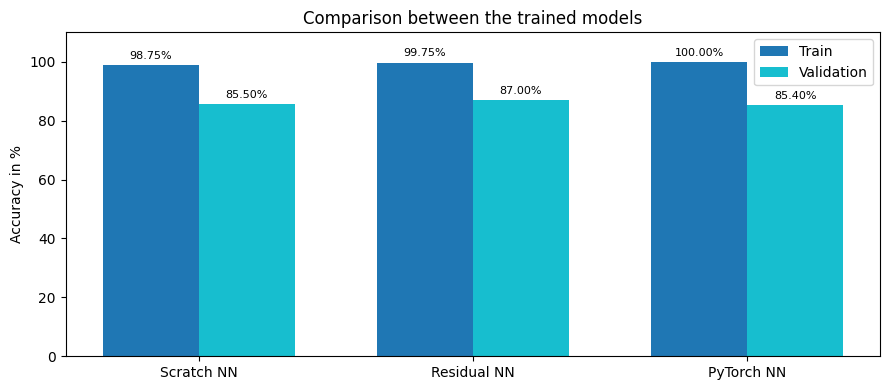

In [39]:
 # Measuring the accuracy of each model using the accuracy methods
scratch_train_acc = fnn.compute_accuracy(x_train, y_train)
scratch_val_acc = fnn.compute_accuracy(x_val, y_val)

res_train_acc = res_nn.compute_accuracy(x_train, y_train)
res_val_acc = res_nn.compute_accuracy(x_val, y_val)

torch_train_acc = torch_nn.compute_accuracy(train_loader).item()
torch_val_acc = torch_nn.compute_accuracy(val_loader).item()

# Converting to percentages
models = ['Scratch NN', 'Residual NN', 'PyTorch NN']
train_accuracies = [scratch_train_acc * 100.0, res_train_acc * 100.0, torch_train_acc * 100.0]
val_accuracies = [scratch_val_acc * 100.0, res_val_acc * 100.0, torch_val_acc * 100.0]

# Plotting the results
x = np.arange(len(models))
width = 0.35
fig, ax = plt.subplots(figsize=(9, 4))

# Setting great colors
blue = "#1f77b4"
turquoise = "#17becf"

bin1 = ax.bar(x - width/2, train_accuracies, width, label='Train', color=pastel_blue)
bin2 = ax.bar(x + width/2, val_accuracies, width, label='Validation', color=pastel_turquoise)

ax.set_ylabel('Accuracy in %')
ax.set_title('Comparison between the trained models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylim(0, 110)
ax.legend()

# Annotating the bars
for rects in (bin1, bin2):
    for r in rects:
        h = r.get_height()
        ax.annotate(f'{h:.2f}%',
                    xy=(r.get_x() + r.get_width() / 2, h),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

### Optional: Hyperparamter tuning using grid search

#### 1. We define our grid and run the different models

In [40]:
# Configuring the grids for grid search
scratch_sizes = [784, 128, 64, 10]
resnet_sizes = [784, 128, 128, 10]

scratch_lrs = [0.05, 0.1, 0.2]
scratch_epochs = [20, 50]
scratch_cosine = [False, True]

torch_lrs = [0.05, 0.1, 0.2]
torch_epochs = [20, 50]

results = []

# Building helper functions to support in grid search
def evaluate_scratch(model_cls, sizes, lr, epochs, cosine):
    model = model_cls(sizes=sizes, learning_rate=lr, epochs=epochs, random_state=GLOBAL_RANDOM_STATE)
    model.fit(x_train, y_train, x_val, y_val, cosine_annealing_lr=cosine)
    train_acc = model.compute_accuracy(x_train, y_train) * 100.0
    val_acc = model.compute_accuracy(x_val, y_val) * 100.0
    return train_acc, val_acc

def evaluate_torch(lr, epochs):
    model = TorchNetwork(sizes=[784, 128, 64, 10], learning_rate=lr, epochs=epochs, random_state=GLOBAL_RANDOM_STATE)
    model.fit(train_loader, val_loader)
    train_acc = model.compute_accuracy(train_loader).item() * 100.0
    val_acc = model.compute_accuracy(val_loader).item() * 100.0
    return train_acc, val_acc

# Scratch FNN using itertools to iterate over the grid search
for lr, ep, cos in itertools.product(scratch_lrs, scratch_epochs, scratch_cosine):
    tr, va = evaluate_scratch(Network, scratch_sizes, lr, ep, cos)
    results.append(dict(model='Scratch NN', learning_rate=lr, epochs=ep, cosine_annealing=cos,
                        train_acc=tr, val_acc=va))

# Residual NN using itertools to iterate over the grid search
for lr, ep, cos in itertools.product(scratch_lrs, scratch_epochs, scratch_cosine):
    tr, va = evaluate_scratch(ResNetwork, resnet_sizes, lr, ep, cos)
    results.append(dict(model='Residual NN', learning_rate=lr, epochs=ep, cosine_annealing=cos,
                        train_acc=tr, val_acc=va))

# PyTorch NN using itertools to iterate over the grid search
for lr, ep in itertools.product(torch_lrs, torch_epochs):
    tr, va = evaluate_torch(lr, ep)
    results.append(dict(model='PyTorch NN', learning_rate=lr, epochs=ep, cosine_annealing=None,
                        train_acc=tr, val_acc=va))

Epoch: 1, Training Time: 0.20s, Training Accuracy: 19.00%, Validation Accuracy: 13.50%
Epoch: 2, Training Time: 0.38s, Training Accuracy: 22.12%, Validation Accuracy: 17.00%
Epoch: 3, Training Time: 0.56s, Training Accuracy: 23.50%, Validation Accuracy: 19.00%
Epoch: 4, Training Time: 0.75s, Training Accuracy: 26.00%, Validation Accuracy: 21.50%
Epoch: 5, Training Time: 0.93s, Training Accuracy: 29.25%, Validation Accuracy: 25.50%
Epoch: 6, Training Time: 1.12s, Training Accuracy: 34.00%, Validation Accuracy: 31.00%
Epoch: 7, Training Time: 1.31s, Training Accuracy: 38.00%, Validation Accuracy: 35.00%
Epoch: 8, Training Time: 1.49s, Training Accuracy: 41.75%, Validation Accuracy: 39.00%
Epoch: 9, Training Time: 1.68s, Training Accuracy: 45.75%, Validation Accuracy: 41.00%
Epoch: 10, Training Time: 1.87s, Training Accuracy: 50.00%, Validation Accuracy: 44.50%
Epoch: 11, Training Time: 2.05s, Training Accuracy: 53.12%, Validation Accuracy: 48.50%
Epoch: 12, Training Time: 2.23s, Training

#### 2. We plot our results

,model,learning_rate,epochs,cosine_annealing,train_acc,val_acc
0,PyTorch NN,0.20,50,None,100.000000,85.399997
1,PyTorch NN,0.10,50,None,100.000000,84.299999
2,Scratch NN,0.20,50,False,97.875000,84.000000
3,Residual NN,0.20,20,True,96.750000,84.000000
4,Residual NN,0.20,20,False,96.750000,84.000000
5,Scratch NN,0.20,50,True,97.875000,84.000000
6,PyTorch NN,0.20,20,None,96.300000,82.499999
7,PyTorch NN,0.05,50,None,96.899998,82.499999
8,Residual NN,0.10,20,True,91.625000,81.500000
9,Residual NN,0.10,20,False,91.625000,81.500000


Best: PyTorch NN | lr=0.2 | epochs=50 | cosine=None | val_acc=85.40%


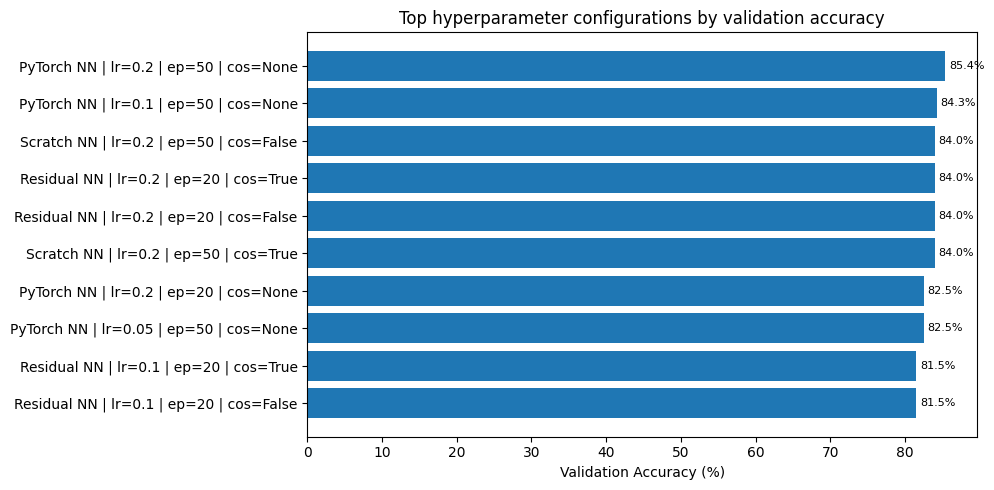

In [41]:
# Summarizing our results in df
df = pd.DataFrame(results).sort_values('val_acc', ascending=False).reset_index(drop=True)
display(df.head(10))


# Print our best model
best = df.iloc[0]
print(f"Best: {best['model']} | lr={best['learning_rate']} | epochs={best['epochs']} "
      f"| cosine={best['cosine_annealing']} | val_acc={best['val_acc']:.2f}%")


# Plotting the best 10 models
top_n = min(10, len(df))
top = df.head(top_n)
fig, ax = plt.subplots(figsize=(10, 5))
ax.barh(range(top_n), top['val_acc'], color=['#1f77b4'])
ax.set_yticks(range(top_n))
ax.set_yticklabels([
    f"{r['model']} | lr={r['learning_rate']} | ep={int(r['epochs'])} | cos={r['cosine_annealing']}"
    for _, r in top.iterrows()
])
ax.invert_yaxis()
ax.set_xlabel('Validation Accuracy (%)')
ax.set_title('Top hyperparameter configurations by validation accuracy')
for i, v in enumerate(top['val_acc']):
    ax.text(v + 0.5, i, f"{v:.1f}%", va='center', fontsize=8)
plt.tight_layout()
plt.show()

#### 3. Short interpretation of results

We run our models with the following different hyperparameters:

- Learning rate: 0.05, 0.10, 0.20

- Number of epochs: 20, 50

- Model types: PyTorch NN, Scratch NN, Residual NN

- Cosine annealing: enabled or disabled

The results seen in the plot above show that the PyTorch neural net with a learning rate of 0.2 trained for 50 epochs without cosine annealing performed best among the different tests, achieving a validation accuracy of 85.40%. Observing the training logs, we can also see that an inefficient learning rate (in this case, too low) can lead the model to initially fit the data reasonably well and improving its training performance, but eventually causing stagnation or even slight deterioration in training and validation performance. This shows how important selecting the right learning rate is.